\begin{center}
Gabe Morris
\end{center}

In [1]:
import sympy as sp
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

plt.style.use('../maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
## Given

![Figure 1](f1.PNG)

## Find
Find the transfer function $\frac{Y(s)}{F(s)}$ for the block diagram.

## Solution
The solution can be determined using two different methods. The first is an algebraic solution where B is the expression after the first block seen above. The second can be determined using the feedback and series functions.

In [2]:
# Using algebra
from sympy.abc import F, Y, B, s

eq1 = sp.Eq((F - 9*B - 7*Y)*1/(s + 2), B)
eq2 = sp.Eq((B*5 - 12*Y)*1/s, Y)
display(eq1, eq2)

Eq((-9*B + F - 7*Y)/(s + 2), B)

Eq((5*B - 12*Y)/s, Y)

In [3]:
sol = sp.solve([eq1, eq2], [Y, B], dict=True)[0]
sol[Y]/F

5/(s**2 + 23*s + 167)

In [4]:
sys1 = ct.feedback(ct.tf(1, [1, 0]), 12)
sys2 = ct.series(5, sys1)
sys3 = ct.feedback(ct.tf(1, [1, 2]), 9)
sys4 = ct.series(sys3, sys2)
sys5 = ct.feedback(sys4, 7)
sys5

TransferFunction(array([5]), array([  1,  23, 167]))

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
## Given

![Figure 2](f2.PNG)

$$L=500\,mH,\ C=100\,\mu F,\ R=300\,\Omega$$

$$v_1=5e^{-t}\sin(6t)\,V,\ v_2=10\sin(t)\,V$$

All initial conditions are zero.

## Find

a. The system of ODE's (should be two equations if using mesh currents).
b. Solve the system for $i_1$, $i_2$, and $i_3$ as seen the figure above. Use any method to find the result and plot up to 6 seconds.

## Solution
### Part A

In [5]:
L_, C_, R_ = 500e-3, 100e-6, 300

L, C, R = sp.symbols('L C R')
t = sp.Symbol('t')
V1 = sp.Function('v_1')(t)
V2 = sp.Function('v_2')(t)
iA = sp.Function('i_A')(t)  # Mesh currents
iB = sp.Function('i_B')(t)  # Mesh currents

eq1 = sp.Eq(L*iA.diff() + R*(iA - iB), V1)  # KVL around iA
eq2 = sp.Eq(1/C*iB + R*(iB.diff() - iA.diff()) + V2.diff(), 0)  # KVL around iB (with derivative across each term)
display(eq1, eq2)

Eq(L*Derivative(i_A(t), t) + R*(i_A(t) - i_B(t)), v_1(t))

Eq(R*(-Derivative(i_A(t), t) + Derivative(i_B(t), t)) + Derivative(v_2(t), t) + i_B(t)/C, 0)

### Part B
The state variable solution is the easiest since we already have a system of first order ODE's.

In [6]:
# Solving using state variables
state_sol = sp.solve([eq1, eq2], [iA.diff(), iB.diff()], dict=True)[0]
for key, value in state_sol.items(): display(sp.Eq(key, value))

Eq(Derivative(i_A(t), t), -R*i_A(t)/L + R*i_B(t)/L + v_1(t)/L)

Eq(Derivative(i_B(t), t), -Derivative(v_2(t), t)/R - R*i_A(t)/L + R*i_B(t)/L + v_1(t)/L - i_B(t)/(C*R))

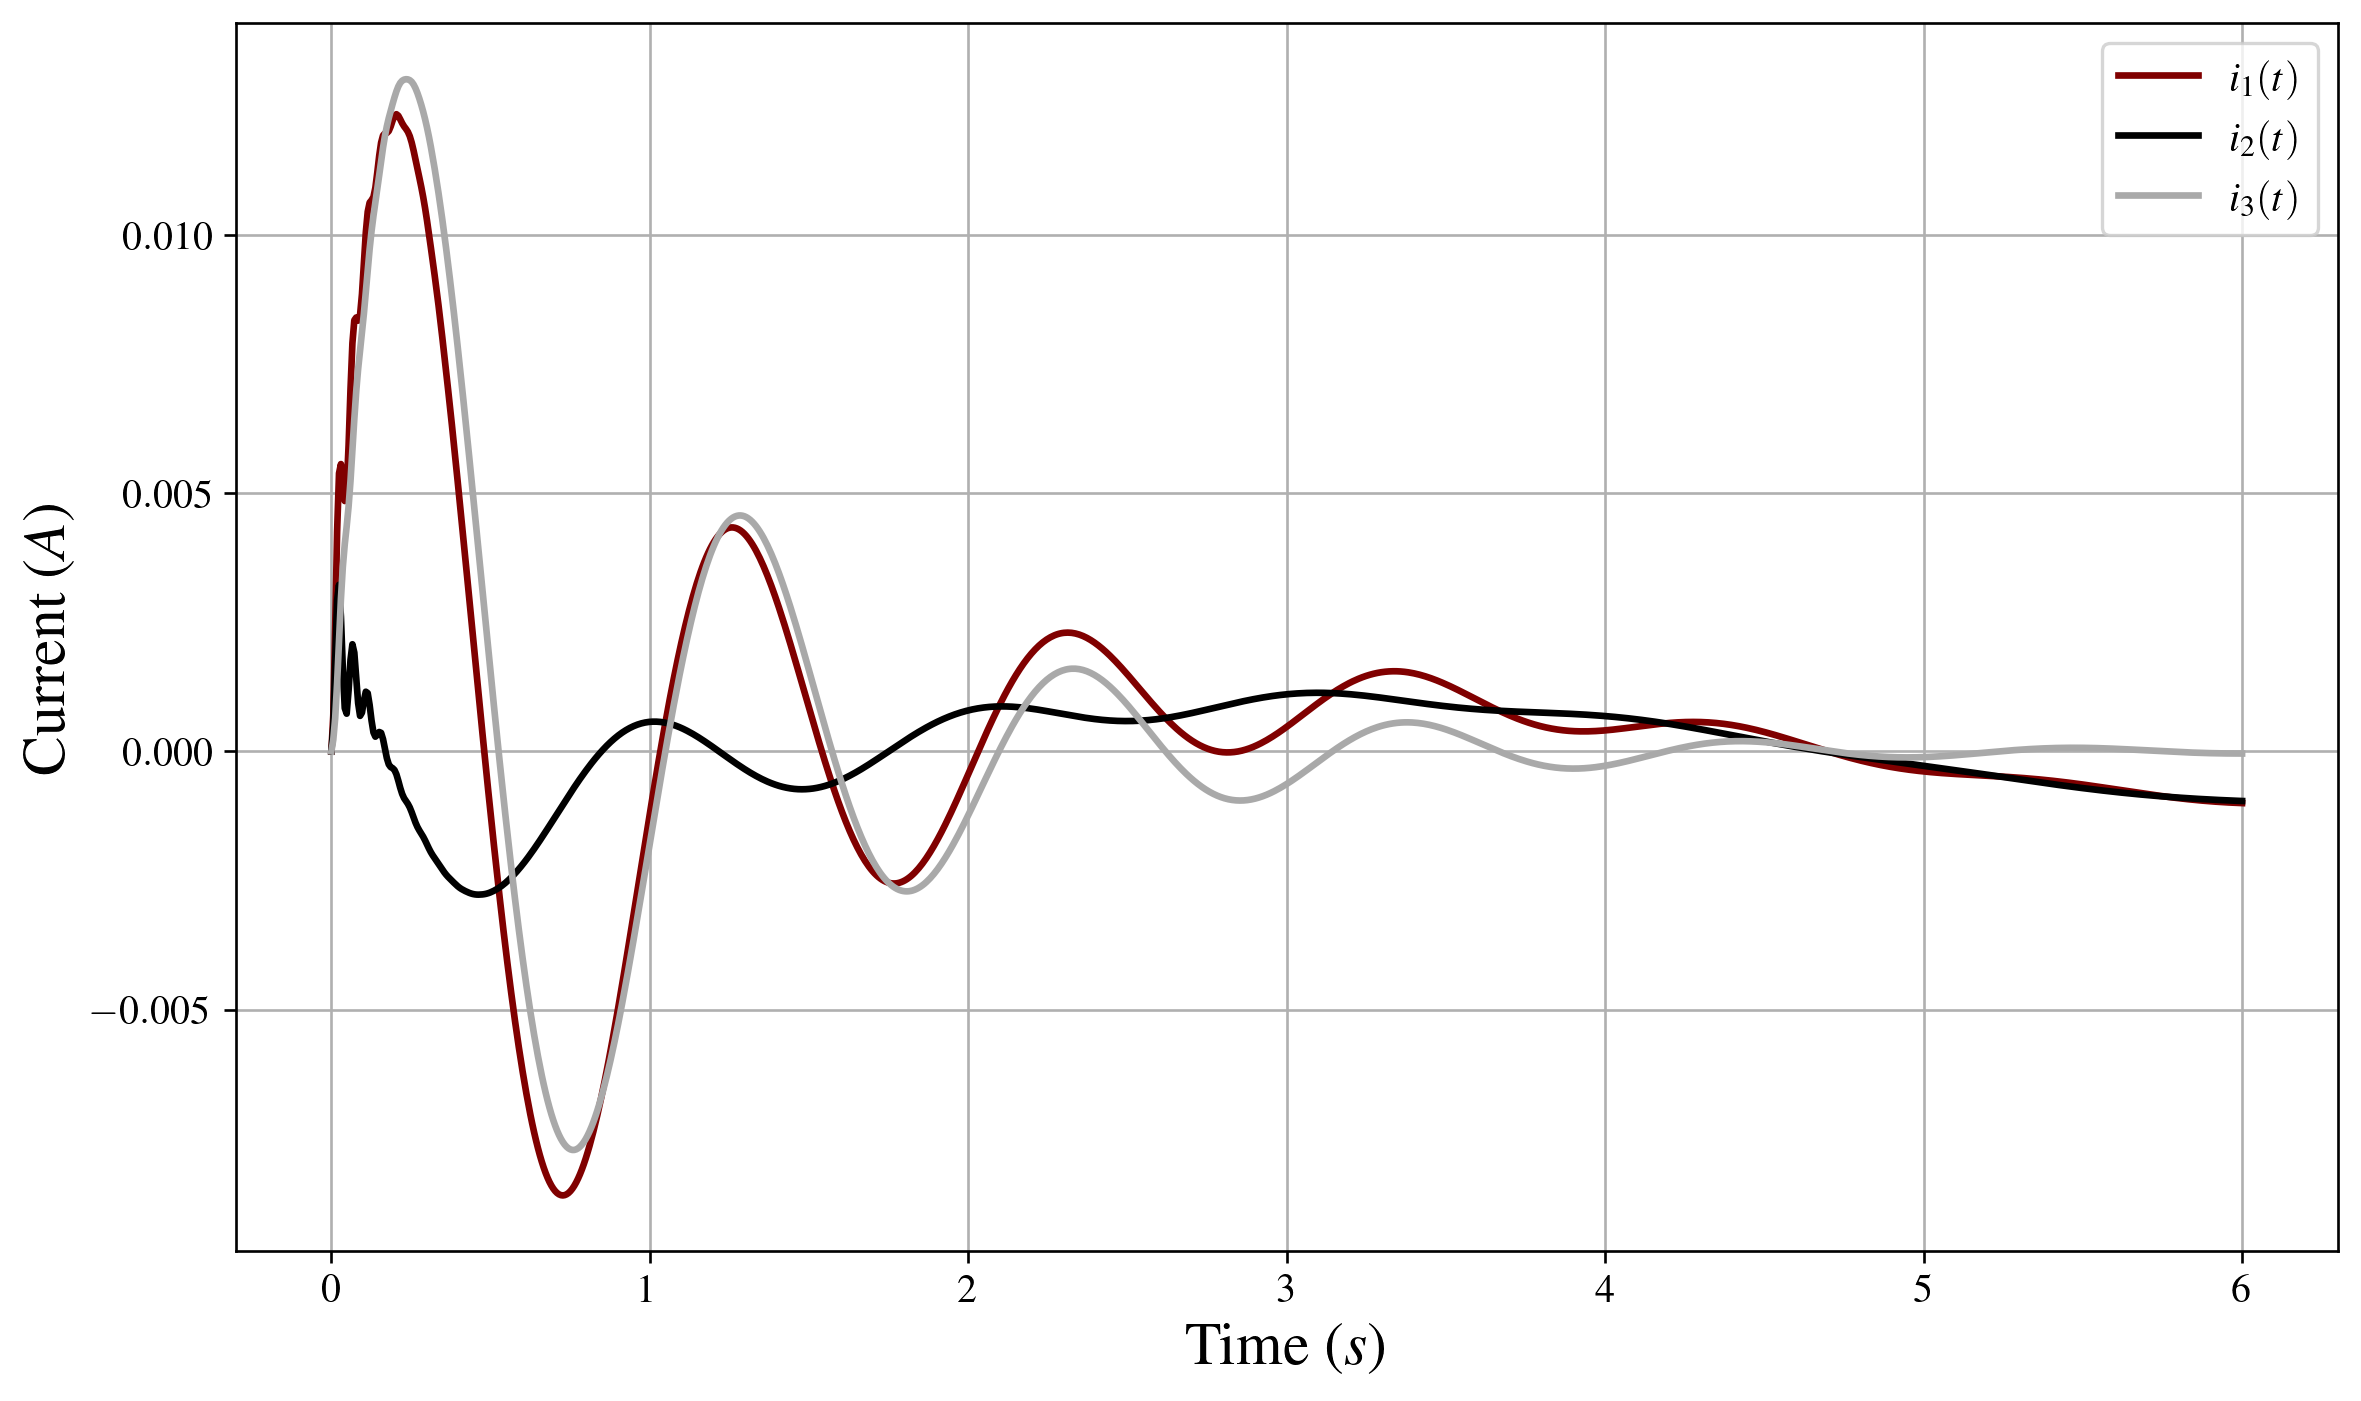

In [7]:
v1 = lambda t_: 5*np.exp(-t_)*np.sin(6*t_)
v2_diff = lambda t_: 10*np.cos(t_)

def state_vars(i_, t_):
    return [
        (v1(t_) + R_*i_[1] - R_*i_[0])/L_,
        -v2_diff(t_)/R_ - R_/L_*i_[0] + R_/L_*i_[1] + v1(t_)/L_ - i_[1]/(C_*R_)
    ]


t_array = np.linspace(0, 6, 1000)
sol = odeint(state_vars, (0, 0), t_array)
iA, iB = sol[:, 0], sol[:, 1]

plt.plot(t_array, iA, label='$i_1(t)$')
plt.plot(t_array, iB, label='$i_2(t)$')
plt.plot(t_array, iA - iB, label='$i_3(t)$')
plt.legend()
plt.xlabel('Time ($s$)')
plt.ylabel('Current ($A$)')
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
## Given

The system shown below is designed to lift the mass with a stiff chain.

![Figure 3](f3.PNG)

$$
\begin{gathered}
K_T=0.01\,\frac{Nm}{A},\ R_1=0.5\,\Omega,\ L_1=0.002\,H \\
I_1=9\cdot10^{-5}\,kg\,m^2,\ I_2=4\cdot10^{-5}\,kg\,m^2,\ I_3=1\cdot10^{-5}\,kg\,m^2,\ I_4=25\cdot10^{-5}\,kg\,m^2 \\
r_1=7.62\,cm,\ r_2=60.96\,cm,\ r_3=2.2\,cm,\ r_4=13\,cm \\
k_1=500\,N/m,\ m_1=220\,kg,\ \theta_{m1}=70^\circ \\
V_{in}=285\,V
\end{gathered}
$$

In [8]:
# Constants
KT, R1, L1, = sp.symbols('K_T R1 L1')
I1, I2, I3, I4 = sp.symbols('I1 I2 I3 I4')  # sympy automatically makes the numbers a subscript
r1, r2, r3, r4 = sp.symbols('r1 r2 r3 r4')
k1, m1, thm1 = sp.symbols(r'k1 m1 \theta_{m1}')

# Other items you should consider using
t = sp.Symbol('t')
th1, th2, th3, th4 = sp.Function(r'\theta_1')(t), sp.Function(r'\theta_2')(t), sp.Function(r'\theta_3')(t), sp.Function(r'\theta_4')(t),
i = sp.Function('i')(t)
x1 = sp.Function('x_1')(t)
Vin = sp.Function('V_{in}')(t)  # Input function

# The sp.S() function ensures that there is no floating point error
sub_values = [
    (KT, sp.S('0.01')),
    (R1, sp.S('0.5')),
    (L1, sp.S('0.002')),
    (I1, sp.S('9e-5')),
    (I2, sp.S('4e-5')),
    (I3, sp.S('1e-5')),
    (I4, sp.S('25e-5')),
    (r1, sp.S('0.0762')),
    (r2, sp.S('0.0762')*8),
    (r3, sp.S('0.022')),
    (r4, sp.S('0.13')),
    (k1, 500),
    (m1, 220),
    (thm1, sp.rad(70))
]


Vin_lamb = lambda t_: 285

## Find
Create a model to determine if the motor is strong enough by finding the following:

a. Determine the equivalent inertia ($I_{eq}$) of the gear train involving $I_1$, $I_2$, $I_3$, and $I_4$ as seen by the output shaft 1 of the motor.
b. Find the governing ODE's of the system.
c. Solve for and plot $x_1(t)$, $\theta_1(t)$, $\omega_1(t)$, and $i(t)$ up to 20 seconds.
d. Comment on the results. Is the motor able to raise the mass?

## Solution
### Part A
Use the concept of velocity ratios to relate everything back to $\omega_1$. We know from this that 

$$
\begin{gathered}
\frac{\omega_2}{\omega_1}=\frac{r_1}{r_2} \\
\omega_3=\omega_2 \\
\frac{\omega_4}{\omega_2}=\frac{r_3}{r_4}
\end{gathered}
$$

In [9]:
half = sp.Rational(1, 2)
KE = half*I1*th1.diff()**2 + half*I2*th2.diff()**2 + half*I3*th3.diff()**2 + half*I4*th4.diff()**2
KE = KE.subs(th3.diff(), th2.diff())  # Same shaft, so same angular velocity
KE = KE.subs(th4.diff(), th2.diff()*r3/r4)
KE = KE.subs(th2.diff(), r1/r2*th1.diff())
KE.simplify()

(I1*r2**2*r4**2 + I4*r1**2*r3**2 + r1**2*r4**2*(I2 + I3))*Derivative(\theta_1(t), t)**2/(2*r2**2*r4**2)

In [10]:
# Dividing the expression by 1/2*omega_1^2 will leave the leave only the equivalent mass behind
Ie = KE/(half*th1.diff()**2)
Ie = Ie.simplify()
Ie.expand()

I1 + I2*r1**2/r2**2 + I3*r1**2/r2**2 + I4*r1**2*r3**2/(r2**2*r4**2)

### Part B
The force of the spring exerts a resistive torque on the equivalent mass that is equal to $F_sr_4$. You can find the output torque on the shaft by implementing the torque ratio for gears, which is $\frac{T_{out}}{T_{in}}=\frac{r_{out}}{r_{in}}$.

$$T_{out}=\frac{r_3r_1}{r_4r_2}F_s=\frac{r_3r_1}{r_2}F_s$$

The force of the spring is $F_s=k_1(r_4\theta_4-x_1)=k_1\left(\frac{r_1r_3}{r_2}\theta_1-x_1\right)$ because the distance that the spool expands/contracts the spring is equal to the arc length of a point on the edge of the spool.

In [11]:
Tm = KT*i
Fs = k1*(x1 - r3*r1/r2*th1)
Tout = Fs.simplify()*r3*r1/r2

eq1 = sp.Eq(Ie.expand()*th1.diff(t, 2), Tm + Tout)
eq2 = sp.Eq(m1*x1.diff(t, 2), -Fs - m1*sp.S('9.81')*sp.sin(thm1))
eq3 = sp.Eq(L1*i.diff() + R1*i + KT*th1.diff(), Vin)
display(eq1, eq2, eq3)

Eq((I1 + I2*r1**2/r2**2 + I3*r1**2/r2**2 + I4*r1**2*r3**2/(r2**2*r4**2))*Derivative(\theta_1(t), (t, 2)), K_T*i(t) + k1*r1*r3*(-r1*r3*\theta_1(t) + r2*x_1(t))/r2**2)

Eq(m1*Derivative(x_1(t), (t, 2)), -k1*(-r1*r3*\theta_1(t)/r2 + x_1(t)) - 9.81*m1*sin(\theta_{m1}))

Eq(K_T*Derivative(\theta_1(t), t) + L1*Derivative(i(t), t) + R1*i(t), V_{in}(t))

### Part C
The best way to solve this is to put it in the state variable form.

In [12]:
# re-defining the names to keep track more easily and adding two state variables
y0, y1, y2, y3, y4 = sp.Function('y0')(t), sp.Function('y1')(t), sp.Function('y2')(t), sp.Function('y3')(t), sp.Function('y4')(t)

eq4 = sp.Eq(y0.diff(), y3)
eq5 = sp.Eq(y1.diff(), y4)

sub_states = [
    (x1, y0),
    (th1, y1),
    (i, y2),
    (y1.diff(t, 2), y4.diff()),
    (y1.diff(), y4),
    (y0.diff(t, 2), y3.diff()),
    (y0.diff(), y3)
]

eq1 = eq1.subs(sub_states)
eq2 = eq2.subs(sub_states)
eq3 = eq3.subs(sub_states)

display(eq1, eq2, eq3, eq4, eq5)

Eq((I1 + I2*r1**2/r2**2 + I3*r1**2/r2**2 + I4*r1**2*r3**2/(r2**2*r4**2))*Derivative(y4(t), t), K_T*y2(t) + k1*r1*r3*(-r1*r3*y1(t) + r2*y0(t))/r2**2)

Eq(m1*Derivative(y3(t), t), -k1*(-r1*r3*y1(t)/r2 + y0(t)) - 9.81*m1*sin(\theta_{m1}))

Eq(K_T*y4(t) + L1*Derivative(y2(t), t) + R1*y2(t), V_{in}(t))

Eq(Derivative(y0(t), t), y3(t))

Eq(Derivative(y1(t), t), y4(t))

In [13]:
state_sol = sp.solve([eq1, eq2, eq3, eq4, eq5], [y0.diff(), y1.diff(), y2.diff(), y3.diff(), y4.diff()], dict=True)[0]
for key, value in state_sol.items(): display(sp.Eq(key, value))

Eq(Derivative(y0(t), t), y3(t))

Eq(Derivative(y1(t), t), y4(t))

Eq(Derivative(y2(t), t), -K_T*y4(t)/L1 - R1*y2(t)/L1 + V_{in}(t)/L1)

Eq(Derivative(y3(t), t), k1*r1*r3*y1(t)/(m1*r2) - k1*y0(t)/m1 - 9.81*sin(\theta_{m1}))

Eq(Derivative(y4(t), t), K_T*r2**2*r4**2*y2(t)/(I1*r2**2*r4**2 + I2*r1**2*r4**2 + I3*r1**2*r4**2 + I4*r1**2*r3**2) - k1*r1**2*r3**2*r4**2*y1(t)/(I1*r2**2*r4**2 + I2*r1**2*r4**2 + I3*r1**2*r4**2 + I4*r1**2*r3**2) + k1*r1*r2*r3*r4**2*y0(t)/(I1*r2**2*r4**2 + I2*r1**2*r4**2 + I3*r1**2*r4**2 + I4*r1**2*r3**2))

In [14]:
# Solution with substituted values
funcs = []
for key, value in state_sol.items():
    display(sp.Eq(key, value.subs(sub_values)))
    args = (y0, y1, y2, y3, y4, Vin)
    funcs.append(sp.lambdify(args, value.subs(sub_values), modules='numpy'))

Eq(Derivative(y0(t), t), y3(t))

Eq(Derivative(y1(t), t), y4(t))

Eq(Derivative(y2(t), t), 500.0*V_{in}(t) - 250.0*y2(t) - 5.0*y4(t))

Eq(Derivative(y3(t), t), -25*y0(t)/11 + 0.00625*y1(t) - 9.81*sin(7*pi/18))

Eq(Derivative(y4(t), t), 15127.6574102329*y0(t) - 41.6010578781406*y1(t) + 110.019326619876*y2(t))

In [15]:
# funcs now has the lambdified version of each equation
funcs[2](_, _, 1, _, 1, 1)  # Testing values on third equation

245.0

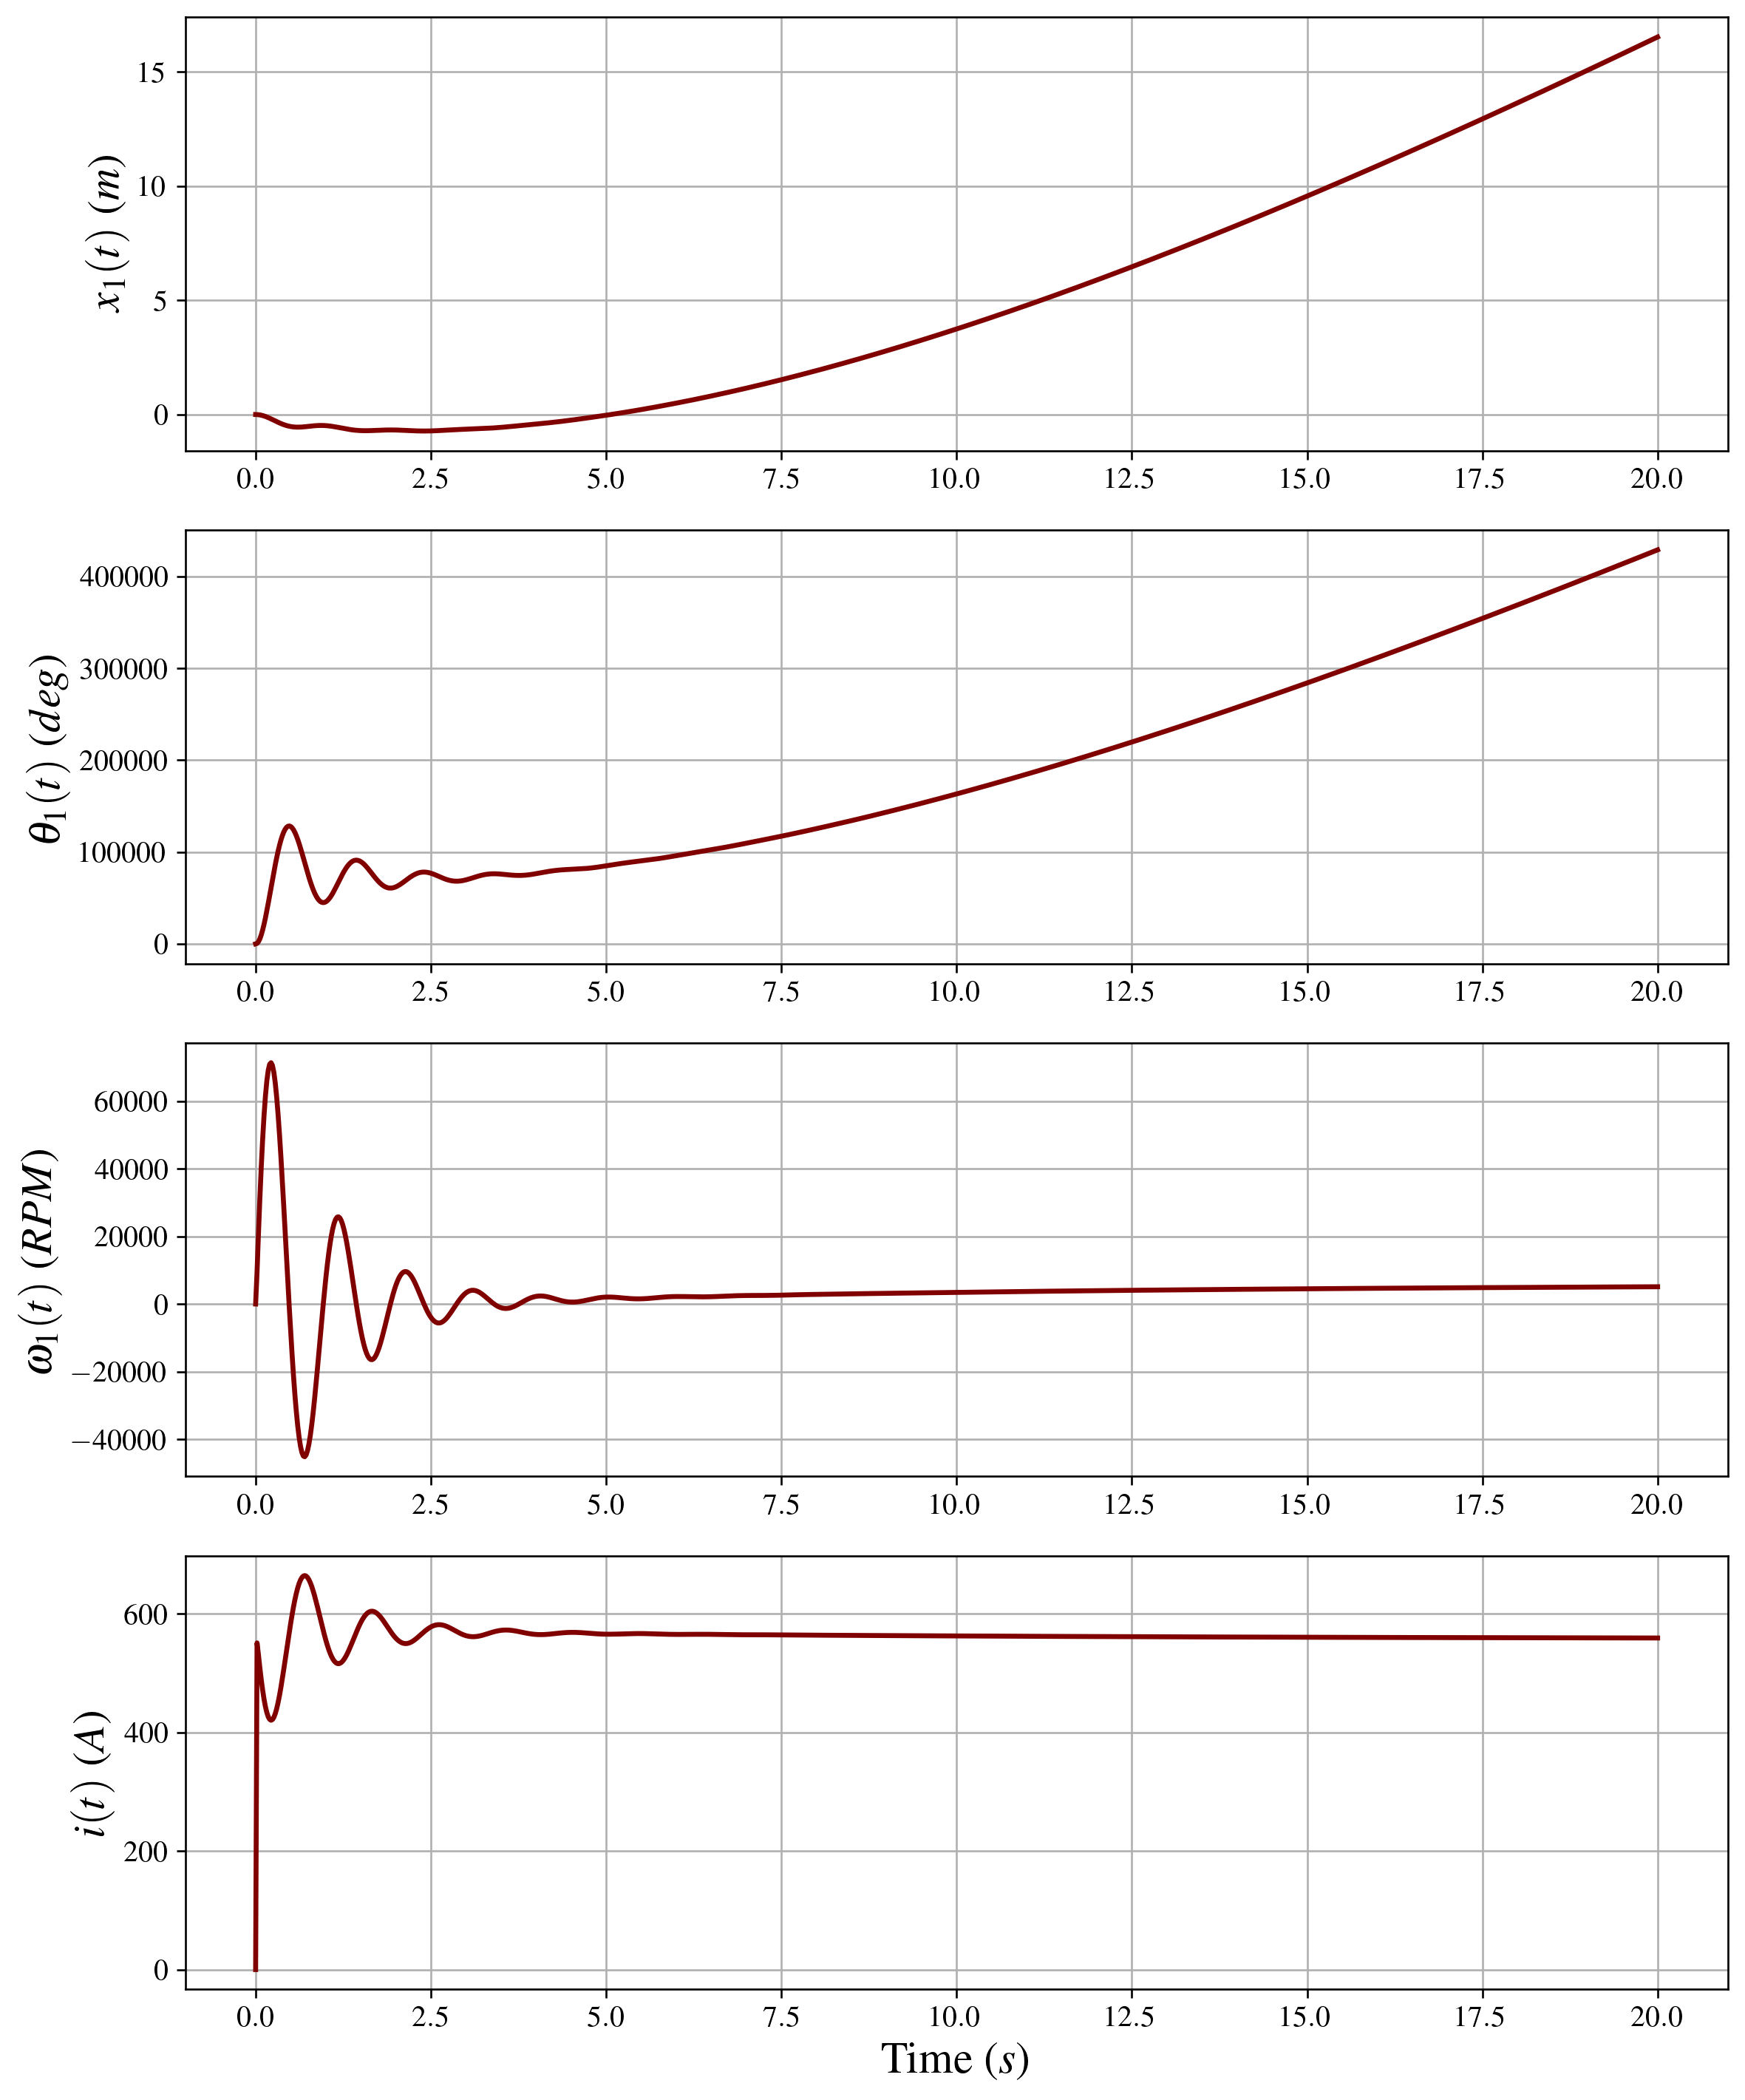

In [16]:
def state_vars(y, t_):
    return [func(y[0], y[1], y[2], y[3], y[4], Vin_lamb(t_)) for func in funcs]

# Solving
t_array = np.linspace(0, 20, 1000)
sol = odeint(state_vars, (0, 0, 0, 0, 0), t_array)
x1_ = sol[:, 0]; th1_ = sol[:, 1]
omega_1 = sol[:, 4]; current = sol[:, 2]

fig, ax = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(12)  # 12 inches

ax[0].plot(t_array, x1_)
ax[0].set_ylabel('$x_1(t)$ ($m$)')
ax[1].plot(t_array, np.rad2deg(th1_))
ax[1].set_ylabel(r'$\theta_1(t)$ ($deg$)')
ax[2].plot(t_array, omega_1*30/np.pi)
ax[2].set_ylabel(r'$\omega_1(t)$ ($RPM$)')
ax[3].plot(t_array, current)
ax[3].set_ylabel('$i(t)$ ($A$)')

ax[-1].set_xlabel('Time ($s$)')
plt.show()

### Part D
The motor is capable to moving the mass upward with the given voltage, but it would be wise to handle the unwanted noise in the beginning of the response by including damping or by implementing a better input function other than an instant 285 volts.